In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

1.Image Representation: 

In [4]:
# Create a 10x10 grid of random numbers between 0 and 255

my_image = np.random.randint(0, 256, size=(10, 10), dtype=np.uint8)
print("This is our original image (as numbers):")
print(my_image)

This is our original image (as numbers):
[[247 175 125 213  79  69 166 184  44 155]
 [ 32 220 162 156 242  11 253 113  89 112]
 [142  60 170  97 188 159 223 107 107 252]
 [ 33 117 107 195  70 118  12   5 248 113]
 [ 54 201 186 203 243 242 200 148 229 122]
 [133  23 162 188 158 124 106  64 164 214]
 [ 47 172 254 239  42 201  43  90 171  26]
 [ 18 249 181  29 117 121 195 152 207  73]
 [196  22   6 161 182   0  16  25 233  94]
 [ 70 116  33 242 169  26  39  29 247 141]]


2.Display (Conceptual): 

Now, let's see our image!


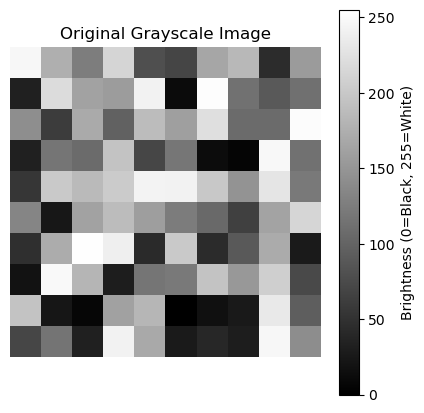

In [5]:
print("Now, let's see our image!")

plt.figure(figsize=(5, 5)) # Makes the image display nicely in the notebook
plt.imshow(my_image, cmap='gray', vmin=0, vmax=255) # Show the image, using gray colors
plt.title('Original Grayscale Image') # Give our image a title
plt.colorbar(label='Brightness (0=Black, 255=White)') # Add a color bar to understand brightness
plt.axis('off') # Hides the x and y numbers on the sides
plt.show() # Make sure the image appears!

3.Grayscale Inversion: 

This is the inverted image (as numbers):
[[  8  80 130  42 176 186  89  71 211 100]
 [223  35  93  99  13 244   2 142 166 143]
 [113 195  85 158  67  96  32 148 148   3]
 [222 138 148  60 185 137 243 250   7 142]
 [201  54  69  52  12  13  55 107  26 133]
 [122 232  93  67  97 131 149 191  91  41]
 [208  83   1  16 213  54 212 165  84 229]
 [237   6  74 226 138 134  60 103  48 182]
 [ 59 233 249  94  73 255 239 230  22 161]
 [185 139 222  13  86 229 216 226   8 114]]


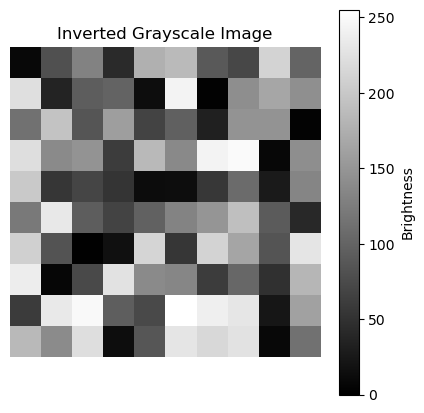

In [6]:
inverted_image = 255 - my_image

print("This is the inverted image (as numbers):")
print(inverted_image)

plt.figure(figsize=(5, 5))
plt.imshow(inverted_image, cmap='gray', vmin=0, vmax=255)
plt.title('Inverted Grayscale Image')
plt.colorbar(label='Brightness')
plt.axis('off')
plt.show()

4.Thresholding: 

This is the image after making it pure black/white (threshold = 128):
[[255 255   0 255   0   0 255 255   0 255]
 [  0 255 255 255 255   0 255   0   0   0]
 [255   0 255   0 255 255 255   0   0 255]
 [  0   0   0 255   0   0   0   0 255   0]
 [  0 255 255 255 255 255 255 255 255   0]
 [255   0 255 255 255   0   0   0 255 255]
 [  0 255 255 255   0 255   0   0 255   0]
 [  0 255 255   0   0   0 255 255 255   0]
 [255   0   0 255 255   0   0   0 255   0]
 [  0   0   0 255 255   0   0   0 255 255]]


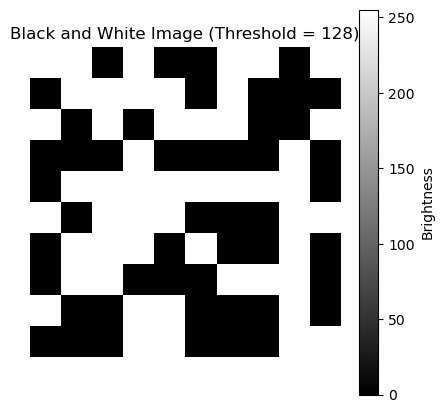

In [7]:
threshold_value = 128 # Our dividing line

# If a pixel in 'my_image' is less than 128, make it 0 (black), otherwise make it 255 (white)
thresholded_image = np.where(my_image < threshold_value, 0, 255).astype(np.uint8)

print(f"This is the image after making it pure black/white (threshold = {threshold_value}):")
print(thresholded_image)

plt.figure(figsize=(5, 5))
plt.imshow(thresholded_image, cmap='gray', vmin=0, vmax=255)
plt.title(f'Black and White Image (Threshold = {threshold_value})')
plt.colorbar(label='Brightness')
plt.axis('off')
plt.show()

5. Cropping: 

This is the cropped 4x4 section of the image:
[[195  70 118  12]
 [203 243 242 200]
 [188 158 124 106]
 [239  42 201  43]]


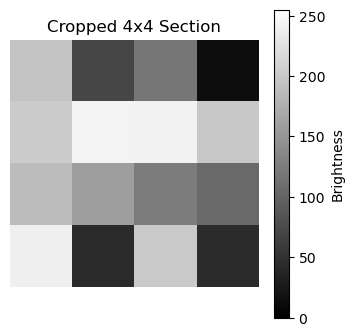

In [8]:
# Our image is 10 rows by 10 columns.
# To get the center 4x4, we need rows from index 3 to 7, and columns from index 3 to 7.
# (Remember, counting starts from 0 in programming!)

# my_image[start_row : end_row, start_column : end_column]
cropped_image = my_image[3:7, 3:7]

print("This is the cropped 4x4 section of the image:")
print(cropped_image)

plt.figure(figsize=(4, 4))
plt.imshow(cropped_image, cmap='gray', vmin=0, vmax=255)
plt.title('Cropped 4x4 Section')
plt.colorbar(label='Brightness')
plt.axis('off')
plt.show()

6. Edge Detection (Simple - Convolution Concept): 

This shows where horizontal edges are (positive means lighter to the right, negative means darker to the right):
[[184 206  88 122 246  97  18 116 111   0]
 [188 198 250  86  25 242 116 232  23   0]
 [174 110 183  91 227  64 140   0 145   0]
 [ 84 246  88 131  48 150 249 243 121   0]
 [147 241  17  40 255 214 204  81 149   0]
 [146 139  26 226 222 238 214 100  50   0]
 [125  82 241  59 159  98  47  81 111   0]
 [231 188 104  88   4  74 213  55 122   0]
 [ 82 240 155  21  74  16   9 208 117   0]
 [ 46 173 209 183 113  13 246 218 150   0]]


C:\Users\bbuser\AppData\Local\Temp\ipykernel_23140\3828431560.py:10: RuntimeWarning: overflow encountered in scalar subtract
  edge_detected_image[i, j] = my_image[i, j+1] - my_image[i, j]


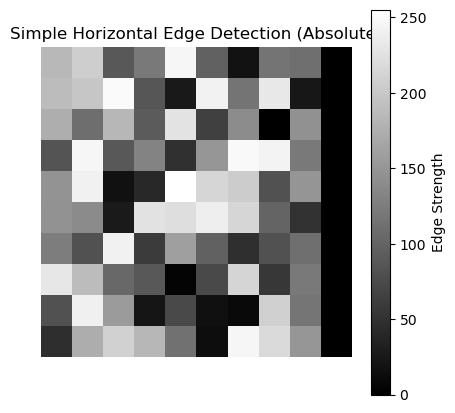

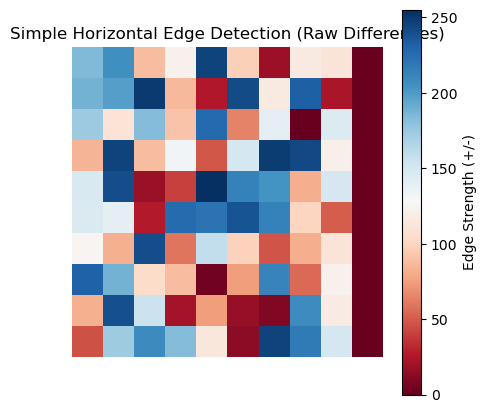

In [9]:
# Create an empty grid (same size as our original image) to store edge results
# We use 'int16' because differences can be negative or positive
edge_detected_image = np.zeros_like(my_image, dtype=np.int16)

# Go through each row (i) and each column (j) of the image
# We stop one column early (image.shape[1] - 1) so we don't go "out of bounds" when looking at j+1
for i in range(my_image.shape[0]): # Loop through rows
    for j in range(my_image.shape[1] - 1): # Loop through columns (but not the very last one)
        # Calculate the difference between the pixel to the right and the current pixel
        edge_detected_image[i, j] = my_image[i, j+1] - my_image[i, j]

print("This shows where horizontal edges are (positive means lighter to the right, negative means darker to the right):")
print(edge_detected_image)

# For displaying, it's often easier to see the absolute difference (strength of edge, regardless of direction)
plt.figure(figsize=(5, 5))
plt.imshow(np.abs(edge_detected_image), cmap='gray') # Show the absolute differences
plt.title('Simple Horizontal Edge Detection (Absolute)')
plt.colorbar(label='Edge Strength')
plt.axis('off')
plt.show()

# You can also see the raw differences (positive/negative edges)
plt.figure(figsize=(5, 5))
plt.imshow(edge_detected_image, cmap='RdBu', vmin=np.min(edge_detected_image), vmax=np.max(edge_detected_image))
plt.title('Simple Horizontal Edge Detection (Raw Differences)')
plt.colorbar(label='Edge Strength (+/-)')
plt.axis('off')
plt.show()